In [10]:
import pandas as pd

data = pd.read_csv('trip.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22701 non-null  object 
 1   tpep_pickup_datetime   22701 non-null  object 
 2   tpep_dropoff_datetime  22701 non-null  object 
 3   payment_method         22701 non-null  object 
 4   passenger_count        22701 non-null  int64  
 5   trip_distance          22701 non-null  float64
 6   fare_amount            22698 non-null  float64
 7   tip_amount             22701 non-null  float64
 8   tolls_amount           22701 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.6+ MB


In [3]:
data.isna().sum()

passenger_name           0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
payment_method           0
passenger_count          0
trip_distance            0
fare_amount              3
tip_amount               0
tolls_amount             0
dtype: int64

In [4]:
data.isna().mean()

passenger_name           0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
payment_method           0.000000
passenger_count          0.000000
trip_distance            0.000000
fare_amount              0.000132
tip_amount               0.000000
tolls_amount             0.000000
dtype: float64

In [14]:
data.loc[data['fare_amount'].isna()]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount


In [13]:
data = data.dropna() # 요금이 어떤 이유에서 없는지 이유를 알 수 없어서 삭제함. 거리에 따른 값을 대신 넣을 수도 있으나, 그 평균 값이 0.01%대에 불과하여 의미가 없다고 판단

<Axes: ylabel='fare_amount'>

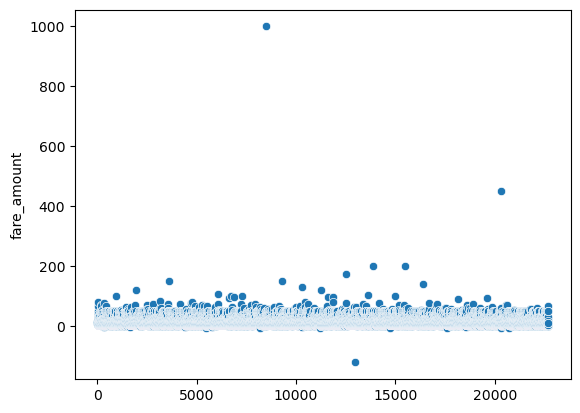

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data['fare_amount'])

In [19]:
data['fare_amount'].sort_values(ascending=False)

8478     999.99
20314    450.00
13863    200.01
15476    200.00
12513    175.00
          ...  
17604     -4.00
14716     -4.00
11206     -4.50
20700     -4.50
12946   -120.00
Name: fare_amount, Length: 22698, dtype: float64

In [21]:
data.loc[[8478, 20314]]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
8478,Alexis Hanson,02/06/2017 5:50:10 AM,02/06/2017 5:51:08 AM,Credit Card,1,2.6,999.99,200.0,0.0
20314,Nicholas Thomas,12/19/2017 9:40:46 AM,12/19/2017 9:40:55 AM,Cash,2,0.0,450.00,0.0,0.0


In [33]:
# 거리 데이터와 fare_amount의 일관성이 없어서 삭제함

data = data.drop([8478,20314])

<Axes: ylabel='passenger_count'>

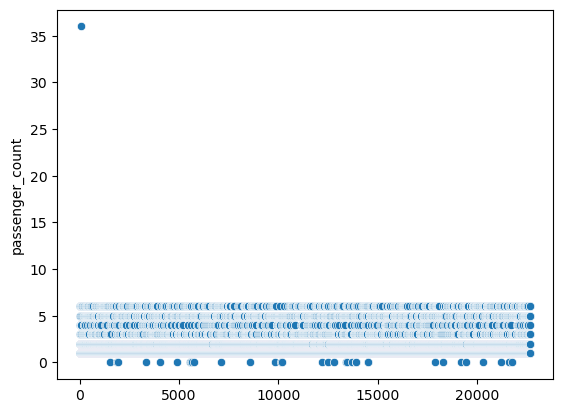

In [15]:
sns.scatterplot(data['passenger_count'])

In [25]:
data['passenger_count'].sort_values(ascending=False)

64       36
0         6
10452     6
17059     6
18101     6
         ..
4062      0
3354      0
13921     0
21640     0
19458     0
Name: passenger_count, Length: 22698, dtype: int64

In [26]:
data.loc[64]

passenger_name                  Manuel Dickson
tpep_pickup_datetime     10/05/2017 9:39:28 AM
tpep_dropoff_datetime    10/05/2017 9:42:32 AM
payment_method                      Debit Card
passenger_count                             36
trip_distance                             0.22
fare_amount                               21.5
tip_amount                                 0.0
tolls_amount                               0.0
Name: 64, dtype: object

In [27]:
data.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22698.000000,22698.000000,22698.000000,22698.000000,22698.000000
mean,1.643581,2.912318,13.024009,1.835327,0.312302
std,1.304983,3.651335,13.240074,2.800093,1.398775
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


In [29]:
data.drop([64])

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.00
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.00
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.00
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.00
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.00
...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.00
22697,Monique Williams,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1,16.71,52.0,14.64,5.76
22698,Drew Graves,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Debit Card,1,0.42,4.5,0.00,0.00
22699,Jonathan Copeland,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Debit Card,1,2.36,10.5,1.70,0.00


<Axes: ylabel='trip_distance'>

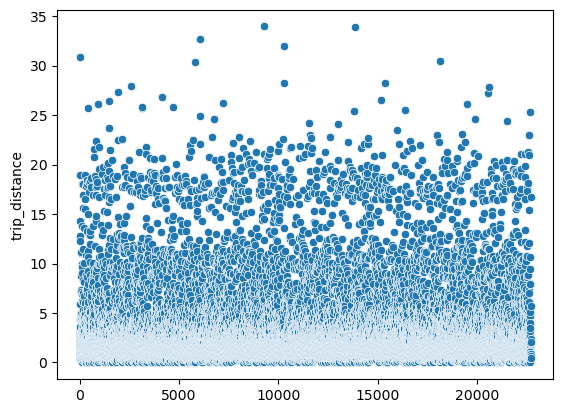

In [16]:
sns.scatterplot(data['trip_distance'])

<Axes: ylabel='tip_amount'>

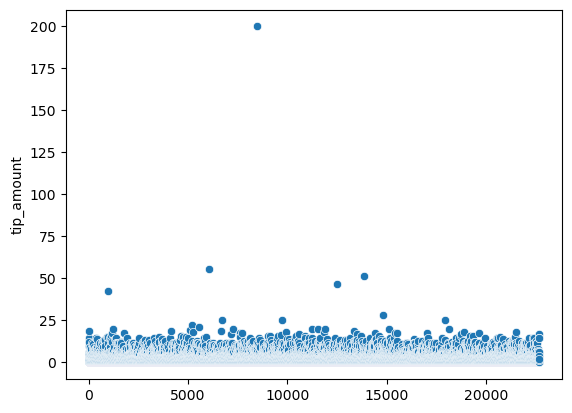

In [17]:
sns.scatterplot(data['tip_amount']) # 8478은 거리에 비해서 과도한 요금을 지불해서 삭제됨



In [30]:
data['tip_amount'].sort_values(ascending=False)

8478     200.00
6066      55.50
13863     51.64
12513     46.69
986       42.29
          ...  
16758      0.00
10702      0.00
10703      0.00
16754      0.00
18100      0.00
Name: tip_amount, Length: 22698, dtype: float64

<Axes: ylabel='tolls_amount'>

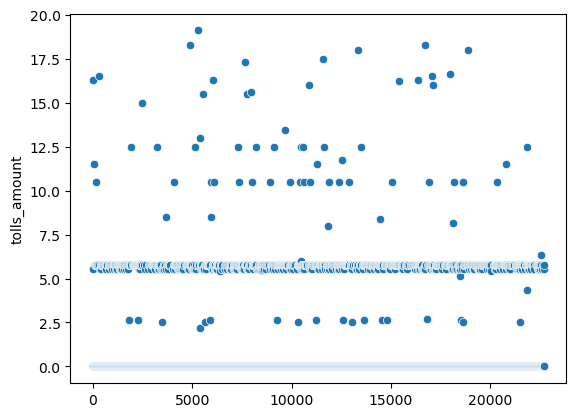

In [18]:
sns.scatterplot(data['tolls_amount'])

In [35]:
data.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22696.000000,22696.000000,22696.000000,22696.000000,22696.000000
mean,1.643594,2.912460,12.961269,1.826677,0.312329
std,1.305032,3.651444,11.134451,2.471980,1.398834
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,200.010000,55.500000,19.100000


In [36]:
data['fare_amount'].sort_values()


12946   -120.00
11206     -4.50
20700     -4.50
17604     -4.00
14716     -4.00
          ...  
9282     150.00
3584     152.00
12513    175.00
15476    200.00
13863    200.01
Name: fare_amount, Length: 22696, dtype: float64

In [49]:
x = data[data['fare_amount'] <= 0].index  # fare_amount에서 0 이하의 값을 삭제
data = data.drop(x)